In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
a = np.random.random(100)

In [16]:
b = np.arange(1,101)

In [12]:
count(a)

NameError: name 'count' is not defined

In [13]:
a.size()

TypeError: 'int' object is not callable

In [14]:
a.size

100

In [17]:
b.size

100

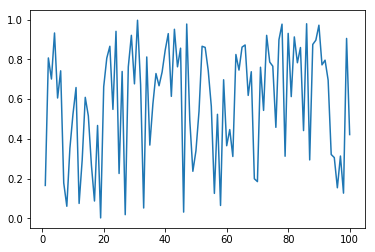

In [20]:
plt.plot(b,a)

Text(0.5, 1.0, 'random numbers')

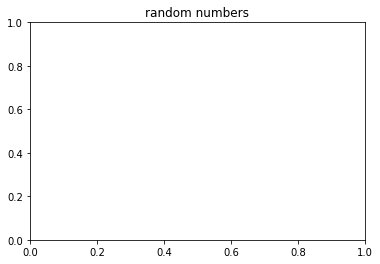

In [21]:
plt.title("random numbers")

In [22]:
%matplotlib inline  

Text(0.5, 1.0, 'random numbers')

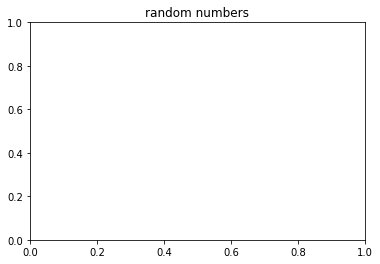

In [23]:
plt.title("random numbers")

In [24]:
plt.show()

In [25]:
from matplotlib import interactive
interactive(False)

Text(0.5, 1.0, 'random numbers')

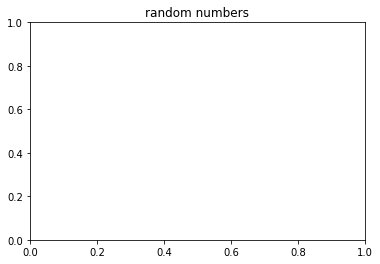

In [28]:
plt.title("random numbers")

In [29]:
plt.isinteractive()

False

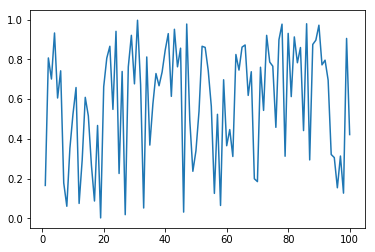

In [30]:
plt.plot(b,a)

Text(0.5, 1.0, 'Hi there')

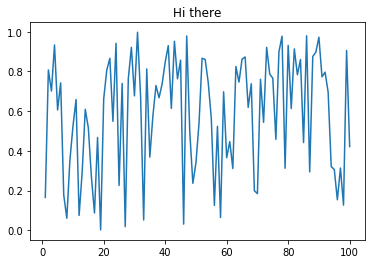

In [31]:
plt.plot(b,a)
plt.title("Hi there")

Text(0.5, 1.0, 'Normal plotting')

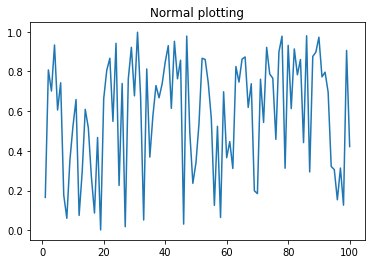

In [32]:
plt.plot(b,a)
plt.title("Normal plotting")

In [35]:
a = np.arange(1950,2001)

In [36]:
a

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000])

In [38]:
rnd = np.random.randint(0, 10, size=(3, a.size))

In [39]:
rnd

array([[0, 8, 4, 0, 3, 1, 9, 1, 2, 6, 1, 7, 8, 2, 1, 2, 3, 1, 2, 7, 6, 6,
        6, 7, 4, 4, 3, 5, 3, 1, 0, 7, 6, 6, 0, 1, 3, 0, 2, 7, 4, 8, 9, 8,
        9, 5, 9, 0, 5, 5, 5],
       [8, 8, 0, 2, 8, 3, 5, 3, 7, 9, 7, 5, 2, 8, 9, 7, 1, 6, 0, 5, 7, 7,
        8, 8, 0, 0, 0, 4, 3, 3, 1, 5, 0, 9, 1, 4, 2, 3, 8, 4, 9, 6, 5, 6,
        1, 8, 0, 8, 9, 5, 9],
       [1, 2, 7, 3, 2, 0, 2, 5, 9, 9, 7, 7, 3, 6, 4, 5, 9, 2, 4, 0, 9, 7,
        0, 1, 4, 6, 2, 3, 9, 1, 6, 7, 9, 4, 9, 8, 7, 7, 7, 0, 4, 2, 1, 5,
        8, 9, 4, 1, 5, 0, 3]])

ValueError: x and y must have same first dimension, but have shapes (100,) and (51,)

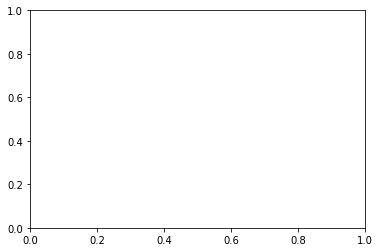

In [40]:
plt.plot(b,a)

In [42]:
a= np.arange(100)

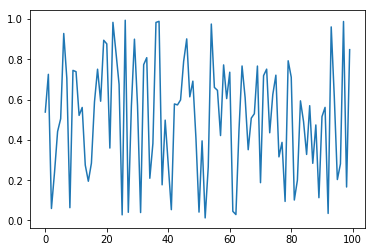

In [47]:
plt.plot(a,b)

In [45]:
b = np.random.random(100)

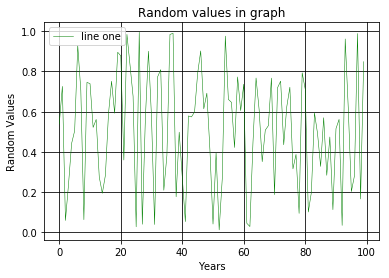

In [59]:
plt.plot(a,b,'g',label='line one',linewidth=0.5)
plt.xlabel("Years")
plt.ylabel("Random Values")
plt.grid(True,color='K')
plt.title("Random values in graph")
plt.legend()

In [65]:
# -----------------------------------------------------------------------------
# Copyright (c) 2014, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License.
# -----------------------------------------------------------------------------
# Based on : https://peak5390.wordpress.com
# -> 2012/12/08/matplotlib-basemap-tutorial-plotting-global-earthquake-activity/
# -----------------------------------------------------------------------------
import geopandas
import urllib
import numpy as np
import matplotlib
matplotlib.rcParams['toolbar'] = 'None'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from  matplotlib.animation import FuncAnimation


# Open the earthquake data
# -------------------------
# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Significant earthquakes in the past 30 days
# url = urllib.urlopen(feed + "significant_month.csv")

# Earthquakes of magnitude > 4.5 in the past 30 days
url = urllib.request.urlopen(feed + "4.5_month.csv")

# Earthquakes of magnitude > 2.5 in the past 30 days
# url = urllib.urlopen(feed + "2.5_month.csv")

# Earthquakes of magnitude > 1.0 in the past 30 days
# url = urllib.urlopen(feed + "1.0_month.csv")

# Set earthquake data
data = url.read()
data = data.split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])
for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])


fig = plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)
P = np.zeros(50, dtype=[('position', float, 2),
                        ('size',     float, 1),
                        ('growth',   float, 1),
                        ('color',    float, 4)])

# Basemap projection
map = Basemap(projection='mill')
map.drawcoastlines(color='0.50', linewidth=0.25)
map.fillcontinents(color='0.95')
scat = ax.scatter(P['position'][:,0], P['position'][:,1], P['size'], lw=0.5,
                  edgecolors = P['color'], facecolors='None', zorder=10)


def update(frame):
    current = frame % len(E)
    i = frame % len(P)

    P['color'][:,3] = np.maximum(0, P['color'][:,3] - 1.0/len(P))
    P['size'] += P['growth']

    magnitude = E['magnitude'][current]
    P['position'][i] = map(*E['position'][current])
    P['size'][i] = 5
    P['growth'][i]= np.exp(magnitude) * 0.1

    if magnitude < 6:
        P['color'][i]    = 0,0,1,1
    else:
        P['color'][i]    = 1,0,0,1
    scat.set_edgecolors(P['color'])
    scat.set_facecolors(P['color']*(1,1,1,0.25))
    scat.set_sizes(P['size'])
    scat.set_offsets(P['position'])

plt.title("Earthquakes > 4.5 in the last 30 days")
animation = FuncAnimation(fig, update, interval=10)
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
import requests
from bs4 import BeautifulSoup
import operator


def start(url):
    word_list = []
    source_code = requests.get(url).text
    soup = BeautifulSoup(source_code, "html.parser")
    for post_text in soup.findAll('a', {'class': 'title'}):
        content = post_text.string
        words = content.lower().split()
        for each_word in words:
            word_list.append(each_word)
    clean_up_list(word_list)


def clean_up_list(word_list):
    clean_word_list = []
    for word in word_list:
        symbols = "!@#$%^&*()_+{}:\"<>?,./;'[]-='"
        for i in range(0, len(symbols)):
            word = word.replace(symbols[i], "")
        if len(word) > 0:
            clean_word_list.append(word)
    create_dictionary(clean_word_list)


def create_dictionary(clean_word_list):
    word_count = {}
    for word in clean_word_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    for key, value in sorted(word_count.items(), key=operator.itemgetter(1)):
        print(key, value)


start('https://thenewboston.com/forum/')


In [1]:
import requests
from bs4 import BeautifulSoup
import operator


def start(url):
    word_list = []
    source_code = requests.get(url).text
    soup = BeautifulSoup(source_code, "html.parser")
    for post_text in soup.findAll('a', {'class': 'title'}):
        content = post_text.string
        words = content.lower().split()
        for each_word in words:
            word_list.append(each_word)
    clean_up_list(word_list)


def clean_up_list(word_list):
    clean_word_list = []
    for word in word_list:
        symbols = "!@#$%^&*()_+{}:\"<>?,./;'[]-='"
        for i in range(0, len(symbols)):
            word = word.replace(symbols[i], "")
        if len(word) > 0:
            clean_word_list.append(word)
    create_dictionary(clean_word_list)


def create_dictionary(clean_word_list):
    word_count = {}
    for word in clean_word_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    for key, value in sorted(word_count.items(), key=operator.itemgetter(1)):
        print(key, value)


start('https://thenewboston.com/forum/')


ConnectionError: HTTPSConnectionPool(host='thenewboston.com', port=443): Max retries exceeded with url: /forum/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000004B89288D0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))